In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [0]:
from google.colab import drive
drive.mount('/content/drive') 
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

data = pd.read_csv('/content/drive/My Drive/4aug/assign/Iris.csv')



In [0]:
data.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
40,5.0,3.5,1.3,0.3,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica
9,4.9,3.1,1.5,0.1,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
39,5.1,3.4,1.5,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [0]:
data.isnull().values.any()
#there are no missing values in dataframe

False

In [0]:
data['Sepal Length (in cm)'] = data['Sepal Length (in cm)'].fillna((data['Sepal Length (in cm)'].mean()))


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [0]:

dummy = pd.get_dummies(data['Class'])
data=pd.concat([data,dummy], axis=1)

In [0]:
data

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
5,5.4,3.9,1.7,0.4,Iris-setosa,1,0,0
6,4.6,3.4,1.4,0.3,Iris-setosa,1,0,0
7,5.0,3.4,1.5,0.2,Iris-setosa,1,0,0
8,4.4,2.9,1.4,0.2,Iris-setosa,1,0,0
9,4.9,3.1,1.5,0.1,Iris-setosa,1,0,0


In [0]:
data.groupby(["Class"]).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Iris-setosa,Iris-versicolor,Iris-virginica
Class,,,,,,,
Iris-setosa,50,50,50,50,50,50,50
Iris-versicolor,50,50,50,50,50,50,50
Iris-virginica,50,50,50,50,50,50,50


In [0]:
dataClass=data.drop(labels='Class', axis=1)
dataClassz= dataClass.apply(zscore)


In [0]:
dataClassz

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Iris-setosa,Iris-versicolor,Iris-virginica
0,-0.900681,1.032057,-1.341272,-1.312977,1.414214,-0.707107,-0.707107
1,-1.143017,-0.124958,-1.341272,-1.312977,1.414214,-0.707107,-0.707107
2,-1.385353,0.337848,-1.398138,-1.312977,1.414214,-0.707107,-0.707107
3,-1.506521,0.106445,-1.284407,-1.312977,1.414214,-0.707107,-0.707107
4,-1.021849,1.263460,-1.341272,-1.312977,1.414214,-0.707107,-0.707107
5,-0.537178,1.957669,-1.170675,-1.050031,1.414214,-0.707107,-0.707107
6,-1.506521,0.800654,-1.341272,-1.181504,1.414214,-0.707107,-0.707107
7,-1.021849,0.800654,-1.284407,-1.312977,1.414214,-0.707107,-0.707107
8,-1.748856,-0.356361,-1.341272,-1.312977,1.414214,-0.707107,-0.707107
9,-1.143017,0.106445,-1.284407,-1.444450,1.414214,-0.707107,-0.707107


In [0]:
target=data['Class']

In [0]:
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [0]:
x=  np.array(dataClassz)

In [0]:
x

array([[-0.90068117,  1.03205722, -1.3412724 , ...,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.14301691, -0.1249576 , -1.3412724 , ...,  1.41421356,
        -0.70710678, -0.70710678],
       [-1.38535265,  0.33784833, -1.39813811, ...,  1.41421356,
        -0.70710678, -0.70710678],
       ...,
       [ 0.79566902, -0.1249576 ,  0.81962435, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.4321654 ,  0.80065426,  0.93335575, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [ 0.06866179, -0.1249576 ,  0.76275864, ..., -0.70710678,
        -0.70710678,  1.41421356]])

In [0]:
y=np.array(target)

In [0]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

## Question 6

*Plot the scatter matrix for all the variables.*

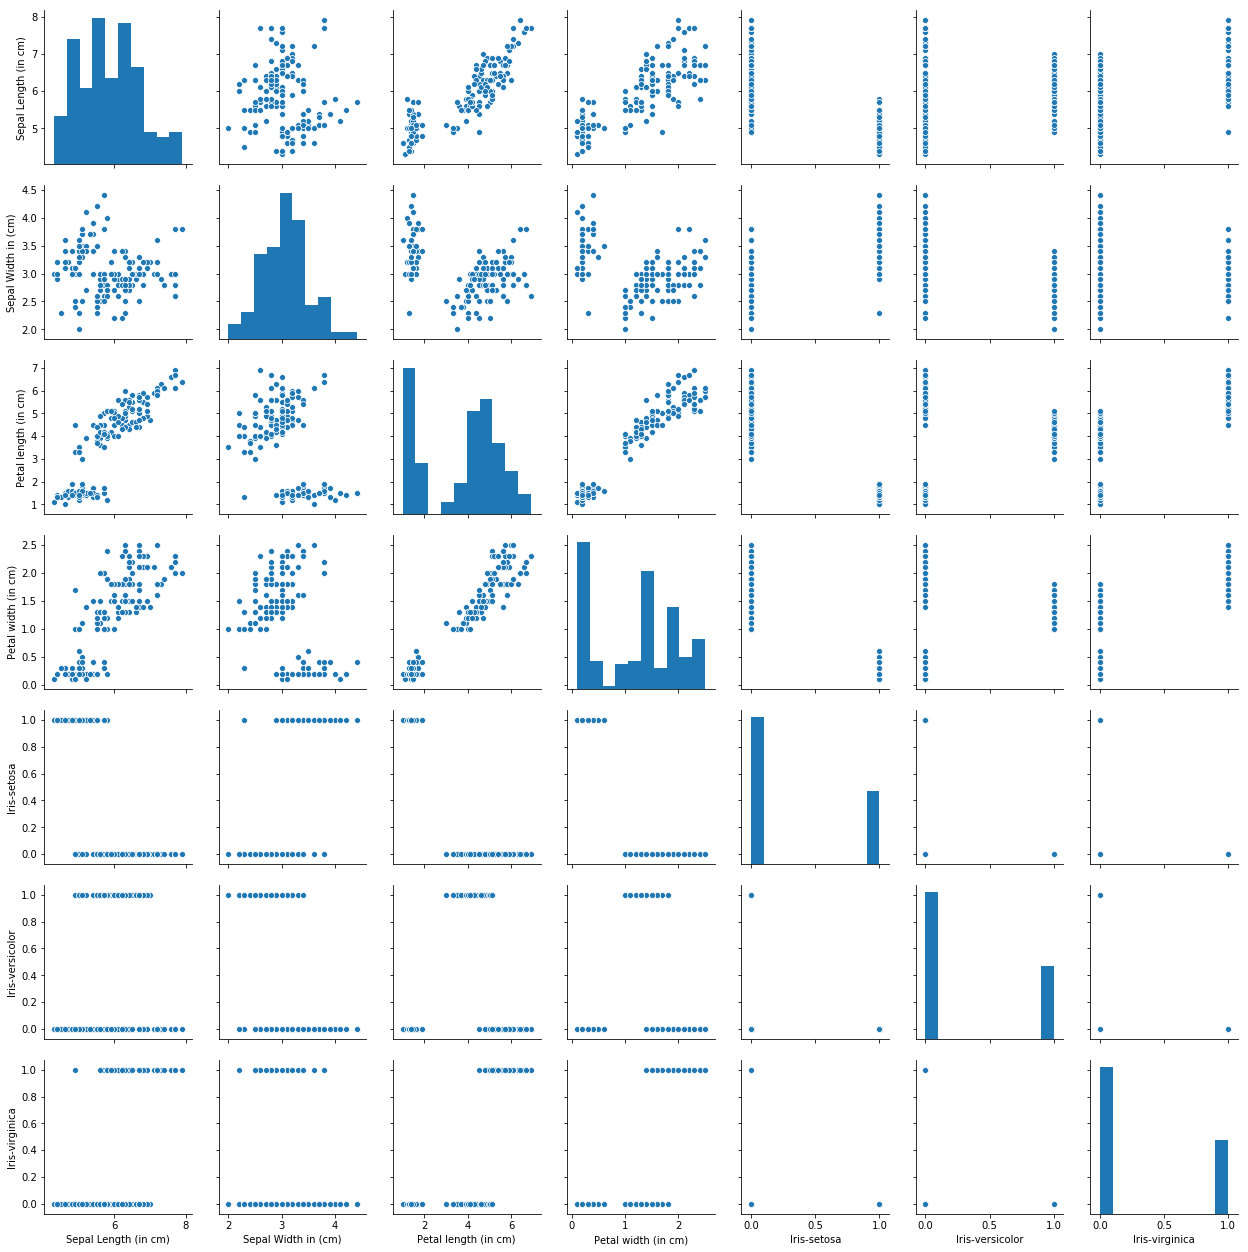

In [0]:
sns.pairplot(data)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [0]:
  from sklearn.model_selection import train_test_split

In [0]:
 x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)

In [0]:
NNH= KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')

In [0]:
NNH.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [0]:
predicted_labels= NNH.predict(x_test)

In [0]:
NNH.score(x_test,y_test)

1.0

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [0]:
from sklearn import   metrics

In [0]:
print(metrics.confusion_matrix(y_test, predicted_labels))


[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

# Naive Bayes with Iris Data

In [0]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [0]:
#Check the dataset
print(y)
print(X)

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [0]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [0]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

### Split data in Training and test set in 80:20.

### Question 13 
Do Feature Scaling 

In [0]:
# Use StandardScaler or similar methods

### Question 14 
Train and Fit NaiveBayes Model

In [0]:
#Fit the model

In [0]:
#Predict

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [0]:
# show Confusion Matrix

In [0]:
# show accuracy

In [0]:
#Show precision and Recall metrics